# The Prisoners’ Dilemma and the Feasible Set of Payoff Vectors
The Prisoners’ Dilemma is a well-known model that highlights the conflict between social cooperation and self-interested behavior. In a two-player Prisoners’ Dilemma, the cooperative payoff possibilities can be mathematically represented by a polytope. This polytope is defined as the convex hull of the payoff vectors (4,4), (6,0), (0,6), and (0,0).

If we consider the Prisoners’ Dilemma as a bargaining situation with a disagreement point d = (d1, d2), where player i cannot receive a payoff below her disagreement point, we can describe the feasible set of payoff vectors (u1, u2) for the bargaining problem as follows: <br>

$u1 + 2u2 ≤ 12$ <br>

$2u1 + u2 ≤ 12$ <br>

$u1 ≥ d1, u2 ≥ d2$ <br>

Understanding this model is not necessary, but knowing the feasible set of payoff vectors is crucial in analyzing the Prisoners’ Dilemma.

## Problem 1
Suppose the disagreement point is given by d = (3.5, 2). A weighted utilitarian criterion is defined as<br>

$W(u1, u2) = θu1 + (1 − θ)u2$ where $θ ∈ [0, 1]$<br>

The weighted utilitarian solution of the bargaining problem, defined as<br>

$max$   $W(u1, u2)$ such that $(u1, u2) ∈ F$ <br>
$u1,u2$ <br>

Plot player 1’s utilitarian optimum u1(θ) as the weight θ varies in [0, 1].

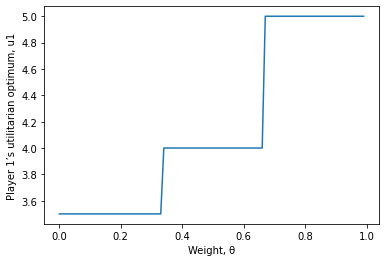

In [17]:
import cvxpy as cp
import matplotlib.pyplot as plt

d = [3.5, 2]
u1 = cp.Variable()
u2 = cp.Variable()
theta = cp.Parameter(nonneg=True)

constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d[0], u2 >= d[1]]
weighted = cp.Maximize(theta*u1 + (1-theta)*u2)
problem = cp.Problem(weighted, constraints)

utilitarian = []

for i in range(100):
    theta.value = i/100
    problem.solve()
    utilitarian.append(u1.value)

plt.plot([i/100 for i in range(100)], utilitarian)
plt.xlabel('Weight, θ')
plt.ylabel('Player 1’s utilitarian optimum, u1')
plt.show()

## Problem 2
Suppose the disagreement point is given by d = (3.5, 2). A Nash welfare criterion is defined
as<br>

$N(u1, u2) = log(u1 − d1) + log(u2 − d2)$ <br>

Find the Nash bargaining solution of the bargaining problem, defined as<br>

$max$    $N(u1, u2)$ such that $(u1, u2) ∈ F$ <br>
$u1,u2$ <br>

1. In addition to displaying the Nash bargaining solution, display the primal optimal value and the optimal dual variables for the constraints as well.
2. Now fix the disagreement payoff of player 2 at d2 = 2. In the same figure, plot how both players’ payoffs in the Nash bargaining solution vary as the disagreement payoff d1 of player 1 varies over the interval [2, 5].

Nash bargaining Solution: (4.249999934669844, 3.5000001072596256)
Primal Optimal Value:  0.11778302005591901
Optimal Dual Variables:  3.6170408140313444e-09 0.6666667548200322 3.202879721090295e-09 1.5363574774749631e-09


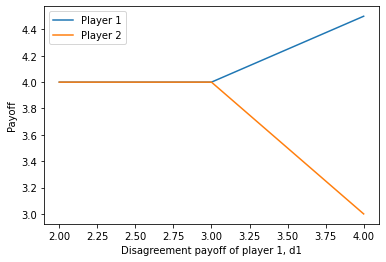

In [18]:
import cvxpy as cp
import matplotlib.pyplot as plt

d = [3.5, 2]
u1 = cp.Variable()
u2 = cp.Variable()

constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d[0], u2 >= d[1]]
welfare = cp.Maximize(cp.log(u1 - d[0]) + cp.log(u2 - d[1]))
problem = cp.Problem(welfare, constraints)

nash = []

problem.solve()

print("Nash bargaining Solution: ({}, {})".format(u1.value, u2.value))
print("Primal Optimal Value: ", problem.value)
print("Optimal Dual Variables: ", constraints[0].dual_value, constraints[1].dual_value, constraints[2].dual_value, constraints[3].dual_value)

d[1] = 2
u1_vals, u2_vals, d1_vals = [], [], []

for d1 in range(2, 6):
    constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= d1, u2 >= 2]

    welfare = cp.Maximize(cp.log(u1 - d1) + cp.log(u2 - 2))
    problem = cp.Problem(welfare, constraints)
    problem.solve()
    
    u1_vals.append(u1.value), u2_vals.append(u2.value), d1_vals.append(d1)

plt.plot(d1_vals, u1_vals, label="Player 1")
plt.plot(d1_vals, u2_vals, label="Player 2")
plt.xlabel("Disagreement payoff of player 1, d1")
plt.ylabel("Payoff")
plt.legend()
plt.show()

## Problem 3 [Interior Point Algorithm Using Log Barrier Method]
Suppose the disagreement point is given by d = (2, 1). Solve Problem 2(a) by implementing the interior point algorithm that uses log barrier for inequality constraints. Display the following:
1. initial t and final t
2. Nash bargaining solution
3. primal optimal value (Maximized Nash welfare)
4. dual optimal variables for constraints
5. inequality constraint function values at the optimum

***
### Algorithm: Line Search Subroutine
```python
Algorithm: Line search subroutine
given a descent direction d for f at the point x ∈ dom f, reduction factor β ∈ (0, 1), and
acceptable descent parameter α ∈ (0, 0.5).
t := 1
while f(x) − f(x + td) < α*− Df(x)(td)
    t := βt
endwhile
return t as the stepsize.
```
***
### Algorithm: Newton descent algorithm
```python
choose an initial point x ∈ dom f, and a tolerance level η for the stopping criterion.
while norm(∇f(x)) > η
1. choose the descent direction as the Newton direction d = ([Hf(x)]^(−1))*(−∇f(x))
2. line search. choose a stepsize t > 0 by the backtracking line search subroutine.
3. update. x := x + td.
endwhile
return x as the minimum.
```
***
### Algorithm: Interior point (log barrier)
```python
choose an initial strictly feasible primal point x, an initial value t = t0 of the accuracy
parameter, the accuracy multiplier μ > 1 (usually a value between 10 to 20), a tolerance
level η for the stopping criterion
while m/t > η (current iterate is not within η-suboptimal)
1. Increase accuracy. t = μt
2. Centering step. Compute the central point x(t) by solving (12.5) using Newton descent
method and x as the initial point.
3. Update the initial point for next iteration. x = x(t)
endwhile
return x as the primal optimum; and λi = −1/t*fi(x) as the i-th dual optimum
```
***
```math
Gradient -> [t/(x-2) + 1/(x+2y-12) + 2/(2x+y-12) - 1/(x-2),
            t/(y-1) + 2/(x+2y-12) + 1/(2x+y-12) - 1/(y-1)]

Hessian -> [[-t/(x-2)^2 - 1/(x+2y-12)^2 - 4/(2x+y-12)^2 + 1/(x-2)^2, -2/(x+2y-12)^2 - 2/(2x+y-12)^2],
            [-2/(x+2y-12)^2 - 2/(2x+y-12)^2, -t/(y-1)^2 - 2/(x+2y-12)^2 - 1/(2x+y-12)^2 + 1/(y-1)^2]]
```

In [19]:
import numpy as np

d1 = 2
d2 = 1

def func(x):
    return np.log(x[0] - 2) + np.log(x[1] - 1)

def f(x, t):
    return -(t * (np.log(x[0] - 2) + np.log(x[1] - 1)) + (-(np.log(-(x[0] + 2 * x[1] - 12)) + np.log(-(2 * x[0] + x[1] - 12)) + np.log(-(x[0] - 2)) + np.log(-(x[1] - 1)))))

def gradient(x0, t):
    x, y = x0
    a = x-d1
    b = y-d2
    c = x+2*y-12
    d = 2*x+y-12
    grad = np.zeros(2)
    grad[0] = t/a + 1/c + 2/d - 1/a
    grad[1] = t/b + 2/c + 1/d - 1/b

    return grad

def hessian(x0, t):
    x, y = x0
    a = x-d1
    b = y-d2
    c = x+2*y-12
    d = 2*x+y-12
    hess = np.zeros((2,2))
    hess[0,0] = -t/(a)**2 - 1/(c)**2 - 4/(d)**2 + 1/(a)**2
    hess[0,1] = -2/(c)**2 - 2/(d)**2
    hess[1,0] = -2/(c)**2 - 2/(d)**2
    hess[1,1] = -t/(b)**2 - 4/(c)**2 - 1/(d)**2 + 1/(b)**2

    return hess

d = [2, 1]
x = [2.001, 1.001]
t = 1
t0 = t
mu = 11
tol = 0.1
d1 = 2
d2 = 1

def lineSearchSubroutine(f, x, d, t, tv=0.001, alpha=0.499, beta=0.1):
    while f(x, t) - f(x+tv*d, t) < -tv*alpha*np.dot(-gradient(x, t), d):
        tv = beta*tv
    return tv

def newtonDescent(f, x, t, tol=0.0001):
    while np.linalg.norm(gradient(x, t)) > tol:
        d = np.dot(np.linalg.inv(hessian(x, t)), -gradient(x, t))
        tv = lineSearchSubroutine(f, x, d, t)
        x = x + tv*d
    return x

def interiorPoint(f, x, t, mu=11, tol=0.1):
    while (4/t) > tol:
        t = t*mu
        x = newtonDescent(f, x, t)
    return x, t

x, t = interiorPoint(f, x, t)

def dual_opt(x, t):
    dual = [-1 / t * (x[0] + 2 * x[1] - 12), -1/t*(2*x[0] + x[1] - 12), -1/t*(-x[0] + d1), -1/t*(-x[1] + d2)]
    return dual

def ineq_con(x):
    ineq = [x[0] + 2*x[1] - 12, 2*x[0] + x[1] - 12, -x[0] + d1, -x[1] + d2]
    return ineq

print("Initial and Final value of t :", t0, t)

print("Nash bargaining Solutions: ", x)

print("Maximized Nash welfare: ", func(x))

print("Inequality constraint functions: ", ineq_con(x))

print("Dual optimal variables: ", dual_opt(x, t))

C:\Users\aditi\AppData\Local\Temp\ipykernel_24936\1482822841.py:10: RuntimeWarning: invalid value encountered in log
  return -(t * (np.log(x[0] - 2) + np.log(x[1] - 1)) + (-(np.log(-(x[0] + 2 * x[1] - 12)) + np.log(-(2 * x[0] + x[1] - 12)) + np.log(-(x[0] - 2)) + np.log(-(x[1] - 1)))))


Initial and Final value of t : 1 121
Nash bargaining Solutions:  [4.01852653 3.92441859]
Maximized Nash welfare:  1.7754634900510857
Inequality constraint functions:  [-0.13263629943976696, -0.03852836054130826, -2.01852652611905, -2.924418587220592]
Dual optimal variables:  [0.0010961677639650161, 0.0003184162028207294, 0.016682037405942565, 0.024168748654715636]
